In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import csv
import os 

# from google.colab import drive
# drive.mount('/content/gdrive')

import matplotlib.pyplot as plt
%matplotlib inline

#### Figure 1 - looking at example comments (e.g. 1 on race, 2 on gender) with distributions
Small number of items, distribution of those items
Sentiment, respect, violence, genocide, hate speech item
Hate score next to each comment
the comments that we should look at should be the ones that we also talk about later in the paper 


In [9]:
#this is for the analysis on demographic background of raters 
data_multi = pd.read_feather('/home/rbarreto/data/scaled-facets-multi-50k-v4.feather')

In [34]:
#listing the hate speech items here for reference later
items = ['sentiment', 'respect', 'insult', 'humiliate', 'status', 'dehumanize', 'violence_phys', 'genocide', 'attack_defend', 'hatespeech']

In [10]:
df_race_distribution = data_multi

In [11]:
df_race_distribution.rename(columns={'demo_race_ethnicitie_1': 'demo_american_indian_alaska_native',
                                       'demo_race_ethnicitie_2': 'demo_asian',
                                       'demo_race_ethnicitie_3': 'demo_black',
                                       'demo_race_ethnicitie_4': 'demo_latino',
                                       'demo_race_ethnicitie_5': 'demo_native_hawaiian_pacific_islander',
                                       'demo_race_ethnicitie_6': 'demo_white',
                                       'demo_race_ethnicitie_7': 'demo_other_race',
                                       'demo_race_ethnicitie_7_text': 'demo_other_race_text',
                                       'demo_race_ethnicitie_8': 'demo_middle_eastern',
                                       'target_race_1': 'target_black',
                                       'target_race_2': 'target_latino',
                                       'target_race_3': 'target_asian',
                                       'target_race_4': 'target_native american',
                                       'target_race_5': 'target_pacific islander',
                                       'target_race_6': 'target_white',
                                       'target_race_7': 'target_other_race',
                                       'target_race_7_text': 'target_other_race_text'}, inplace=True)

In [12]:
def label_race(row):
    if row['demo_american_indian_alaska_native'] == 1:
        return 'american indian alaska native'

    if row['demo_american_indian_alaska_native'] + row['demo_asian'] + row['demo_black'] + row['demo_latino'] + row['demo_native_hawaiian_pacific_islander'] + row['demo_white'] + row['demo_other_race'] + row['demo_middle_eastern'] > 1:
        return 'two or more races'

    if row['demo_asian'] == 1:
        return 'asian'
    if row['demo_black'] == 1:
        return 'black'
    if row['demo_latino'] == 1:
        return 'latino'
    if row['demo_native_hawaiian_pacific_islander'] == 1:
        return 'native hawaiian pacific islander'
    if row['demo_white'] == 1:
        return 'white'
    if row['demo_other_race'] == 1:
        return 'other race'
    if row['demo_middle_eastern'] == 1:
        return 'middle eastern'
    return 'unknown'

In [13]:
#applying function to df
#making the NAs into 0 for the function above to work

df_race_distribution.replace('NA', 0).apply(label_race, axis=1) #axis =1 means application is done at row rather than column lelvel


0          white
1          white
2          white
3          white
4          white
           ...  
135551    latino
135552     white
135553     white
135554     white
135555    latino
Length: 135556, dtype: object

In [23]:
df_race_distribution['race_label'] = df_race_distribution.replace('NA', 0).apply(label_race, axis=1)

In [24]:
#for comment 20,001 there are 799 unique labelers
#we want to be able to just plug and play the visualization for other comments, so consider making it a function
df_20001 = df_race_distribution[df_race_distribution['comment_id'] == 20001]
df_20001['labeler_id'].nunique()

799

In [81]:
#what is the average across all items for black vs white labelers
#make sure including comments that have enough black labelers

#will need to group by race (black and white)

#df[df['comment_id'].isin(comment_ids_g100)].groupby(by=['predict_text', 'comment_id']).mean()
df_20001_race = df_20001[df_20001['race_label'].isin(['black', 'white'])].groupby(by=['race_label', 'comment_id']).mean()[items]
df_20001_race 

,,sentiment,respect,insult,humiliate,status,dehumanize,violence_phys,genocide,attack_defend,hatespeech
race_label,comment_id,,,,,,,,,,
black,20001,4.000000,3.944444,2.888889,1.625000,0.805556,0.708333,0.958333,0.972222,2.916667,1.000000
white,20001,3.956303,3.969748,2.857143,1.485714,0.899160,0.761345,0.976471,0.969748,2.853782,0.989916


In [82]:
df_20001[df_20001['race_label'] == 'black']['labeler_id'].nunique()

72

In [83]:
unique_white_20001 = df_20001[df_20001['race_label'] == 'white']['labeler_id'].nunique()
unique_black_20001 = df_20001[df_20001['race_label'] == 'black']['labeler_id'].nunique()

print('number of unique white labelers in comment 20001 is:', unique_white_20001)
print('number of unique black labelers in comment 20001 is:', unique_black_20001)

#the reason these don't add up to 799 is bc we are filtering out any non black / non white labelers 

number of unique white labelers in comment 20001 is: 595
number of unique black labelers in comment 20001 is: 72


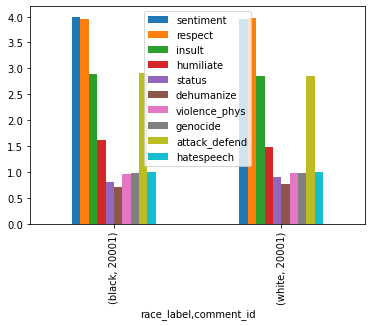

In [84]:
df_20001_race.plot.bar();

#one of the issues is that the the range that each item can take is not uniform 
#ie some items have been collapsed to binary, others are on a Likert scale (1-5)
#so how do we show that on here

In [90]:
df_20001_race.reset_index(level=['race_label', 'comment_id'], inplace=True)


In [103]:
df_20001_race.set_index('race_label', inplace=True)

In [106]:
df_20001_race

,comment_id,sentiment,respect,insult,humiliate,status,dehumanize,violence_phys,genocide,attack_defend,hatespeech,item
race_label,,,,,,,,,,,,
black,20001,4.000000,3.944444,2.888889,1.625000,0.805556,0.708333,0.958333,0.972222,2.916667,1.000000,
white,20001,3.956303,3.969748,2.857143,1.485714,0.899160,0.761345,0.976471,0.969748,2.853782,0.989916,


In [107]:
df_20001_race = df_20001_race.drop('item', 1)

In [110]:
df_20001_race = df_20001_race.drop('comment_id', 1)

In [111]:
df_20001_race.columns.values

array(['sentiment', 'respect', 'insult', 'humiliate', 'status',
       'dehumanize', 'violence_phys', 'genocide', 'attack_defend',
       'hatespeech'], dtype=object)

In [115]:
df_20001_race.T


race_label,black,white
sentiment,4.000000,3.956303
respect,3.944444,3.969748
insult,2.888889,2.857143
humiliate,1.625000,1.485714
status,0.805556,0.899160
dehumanize,0.708333,0.761345
violence_phys,0.958333,0.976471
genocide,0.972222,0.969748
attack_defend,2.916667,2.853782
hatespeech,1.000000,0.989916


In [114]:
#make the columns values (black, white) into columns
df_20001_race.T.columns

Index(['black', 'white'], dtype='object', name='race_label')

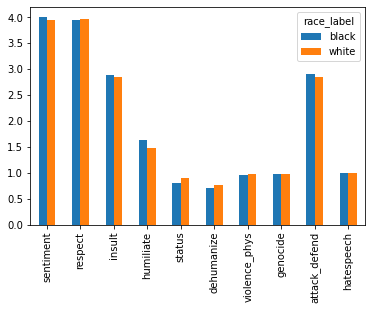

In [118]:
df_20001_race.T.plot.bar();

In [ ]:
#what's the comment_id that targets black folks and that has the most black labelers on it?
#this could help us decide which comments to see and also is interesting in and of itself
#for comments with greater than 50 labelers, what does the distribution of black labelers

In [124]:
#okay so here's a function that does everything we just did and puts into one 

def mean_item_by_race(df, comment_id_no):
    """ comment_id_no is the comment id number
    df is the dataframe"""
    
    items = ['sentiment', 'respect', 'insult', 'humiliate', 'status', 'dehumanize', 'violence_phys', 'genocide', 'attack_defend', 'hatespeech'] 
    
    df_comment = df[df['comment_id'] == comment_id_no]
    
    df_comment_race = df_comment[df_comment['race_label'].isin(['black', 'white'])].groupby(by=['race_label', 'comment_id']).mean()[items]
    
    df_comment_race.reset_index(level=['comment_id'], inplace=True)
    
    df_comment_race = df_comment_race.drop('comment_id', 1)
    
    return df_comment_race.T.plot.bar()

 

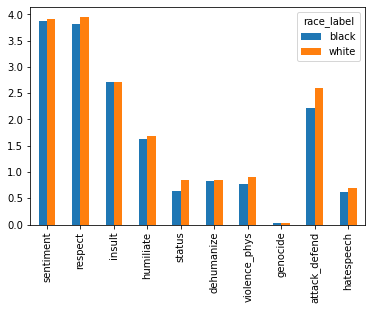

In [125]:
#chose comment from men_v_women comments
mean_item_by_race(df_race_distribution, 20005);

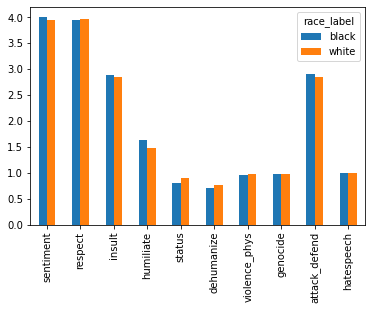

In [126]:
#chose comment from black_v_white comments
mean_item_by_race(df_race_distribution, 20001);